# <center> ASSIGNMENT 2 </center>
## <center>  Binary Classification using Na¨ıve Bayes and K-Nearest Neighbors </center>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KDTree,KNeighborsClassifier,BallTree
import seaborn as sns
import time

In [26]:
df = pd.read_csv("./datasets/dataset2.csv")
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [27]:
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

<BarContainer object of 2 artists>

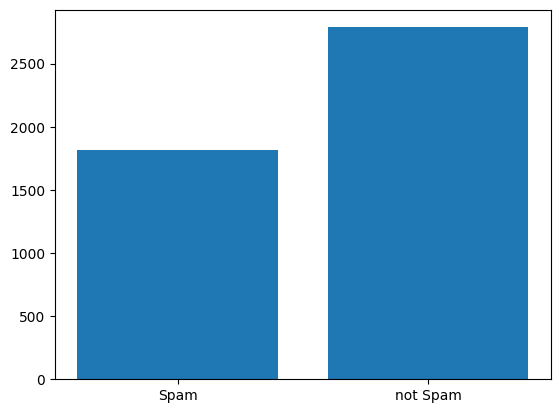

In [28]:
#EDA

# print(df.corr())

plt.bar(["Spam", "not Spam"], [len(df[df["class"]==1]),len(df[df["class"]==0])])




<Axes: >

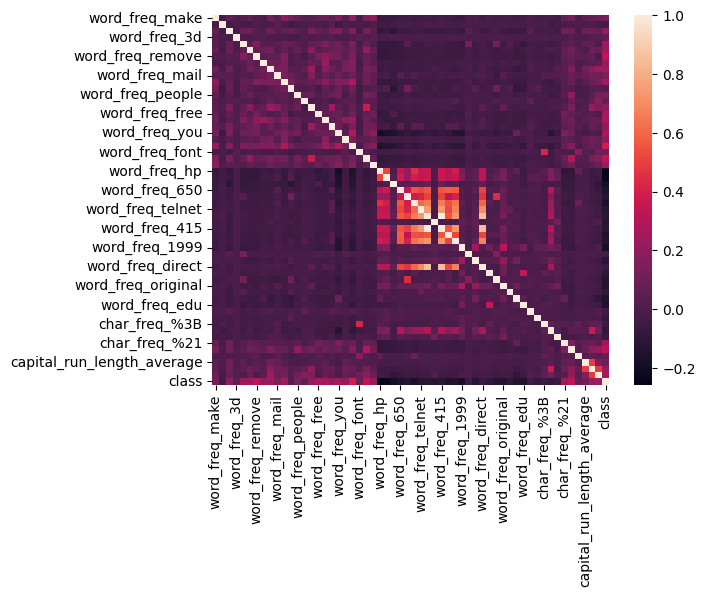

In [29]:
sns.heatmap(df.corr())

In [30]:
X = df[columns]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [62]:
def evaluate(model):
    start = time.time()
    model.fit(X_train,y_train)
    training_over = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - training_over
    training_time = training_over - start

    conf_matrix = confusion_matrix(y_test,y_pred)
    print("Model: ", model.__class__)
    print("Training time:", training_time)
    print("Prediction time: ", prediction_time)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 score: ", f1_score(y_test, y_pred))
    print("FPR: ", conf_matrix[0][1]/(conf_matrix[0][1]+conf_matrix[0][0]))
    print("Specificity: ", conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1]))

    fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    ConfusionMatrixDisplay(conf_matrix).plot(ax=axes[0])
    axes[0].set_title("CONFUSION MATRIX")
    # fpr,tpr,thr = roc_curve(y_test,y_pred)
    # auc_score = roc_auc_score(y_test, y_pred)
    # axes[1].plot(fpr,tpr,label=f"AUC SCORE = {auc_score:.4f}")
    RocCurveDisplay.from_predictions(y_test, y_pred,ax=axes[1])
    axes[1].set_title("ROC CURVE")
    plt.tight_layout()
    plt.show()




    


## Naive Bayes

### Gaussian Naive Bayes

Model:  <class 'sklearn.naive_bayes.GaussianNB'>
Training time: 0.009003162384033203
Prediction time:  0.00374603271484375
Accuracy:  0.8053866203301477
Precision:  0.6828478964401294
Recall:  0.9377777777777778
F1 score:  0.7902621722846442
FPR:  0.2796005706134094
Specificity:  0.7203994293865906


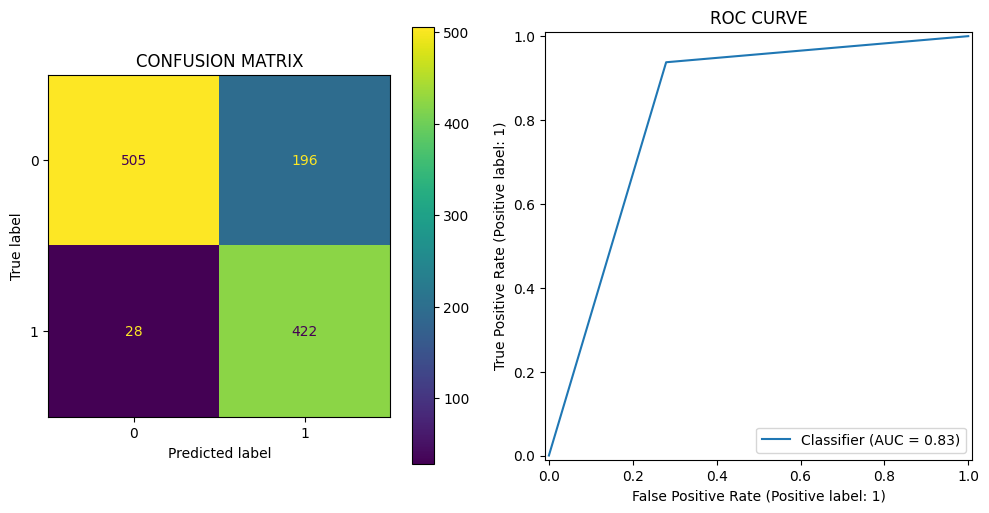

In [63]:

gnb = GaussianNB()
evaluate(gnb)


### Multinomial Naive Bayes

Training time: 0.00803065299987793
Prediction time:  0.03119659423828125
Accuracy:  0.8905299739357081
Precision:  0.9628571428571429
Recall:  0.7488888888888889
F1 score:  0.8425
FPR:  0.018544935805991442
Specificity:  0.9814550641940085


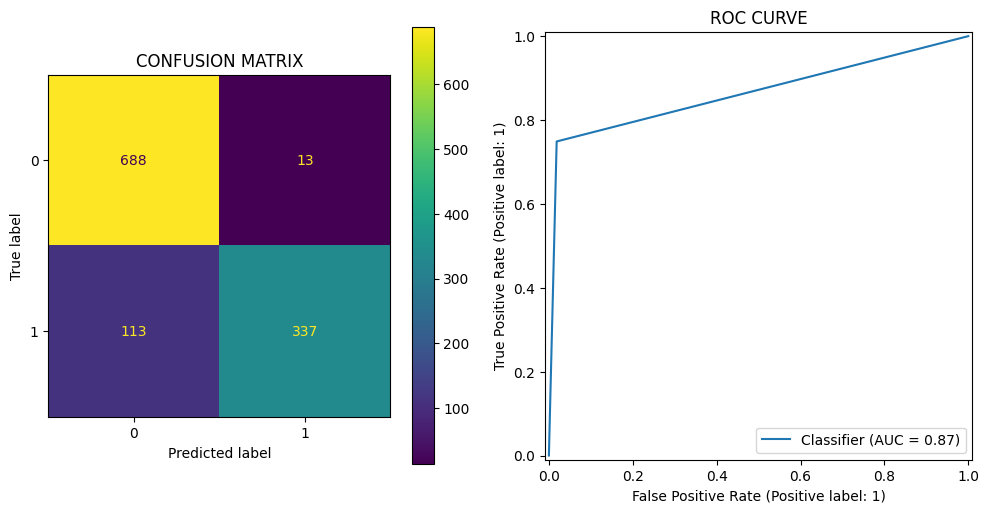

In [55]:
mnb = MultinomialNB()
evaluate(mnb)

### Bernoulli Naive Bayes

Training time: 0.012373685836791992
Prediction time:  0.004069805145263672
Accuracy:  0.893136403127715
Precision:  0.8997555012224939
Recall:  0.8177777777777778
F1 score:  0.8568102444703143
FPR:  0.05848787446504993
Specificity:  0.9415121255349501


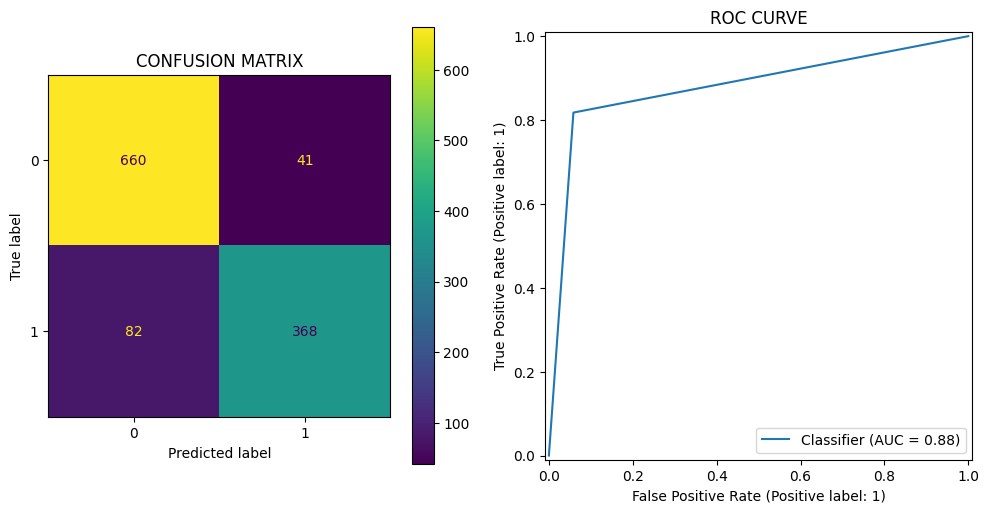

In [56]:
bnb = BernoulliNB()
evaluate(bnb)

## KNN

### Accuracy vs k

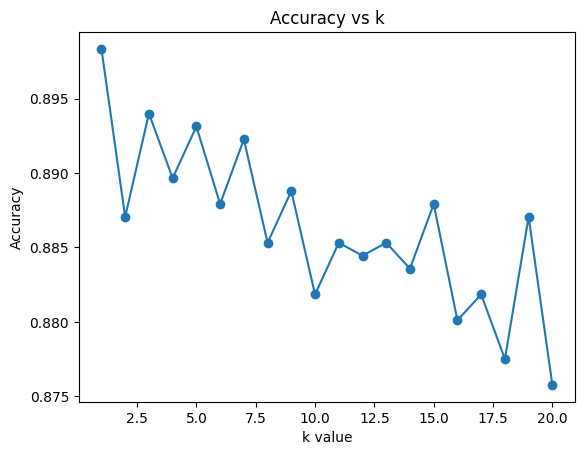

In [66]:
k_values = range(1, 21)
accuracies = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracies.append(accuracy_score(y_test,y_pred))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

### Grid Search vs Randomized search

In [69]:
param_grid = {
    'n_neighbors': range(1, 21, 2),   # [1, 3, 5, ..., 19]
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

start = time.time()

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
end = time.time()

random_search = RandomizedSearchCV(
    estimator = KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
random_search.fit(X_train,y_train)
end2 = time.time()

print(grid_search.best_estimator_,grid_search.best_score_,grid_search.best_params_)
print(random_search.best_estimator_,random_search.best_score_,random_search.best_params_)
print("Time Grid search: ",end-start)
print("Time Randomized Search: ", end2-end)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance') 0.9176811594202899 {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance') 0.9176811594202899 {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
Time Grid search:  2.961963653564453
Time Randomized Search:  0.7501847743988037


Model:  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Training time: 0.05698108673095703
Prediction time:  0.46951723098754883
Accuracy:  0.9139878366637706
Precision:  0.9354838709677419
Recall:  0.8377777777777777
F1 score:  0.8839390386869871
FPR:  0.037089871611982884
Specificity:  0.9629101283880172


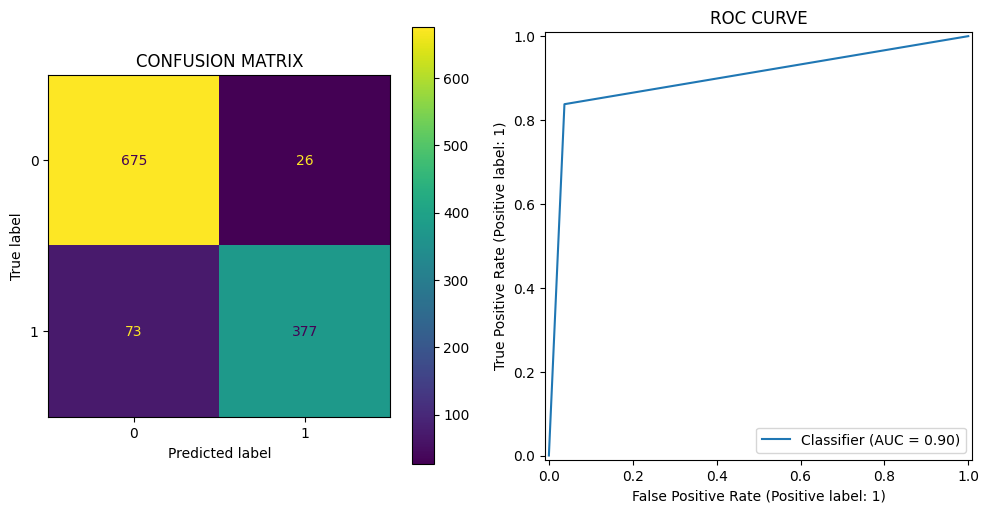

In [70]:
optimal_k = grid_search.best_params_['n_neighbors']
optimal_weights = grid_search.best_params_['weights']
optimal_metric = grid_search.best_params_['metric']
knn_kd=KNeighborsClassifier(
    n_neighbors=optimal_k,
    weights=optimal_weights,
    metric=optimal_metric,
    algorithm='kd_tree'
)

evaluate(knn_kd)

### Ball Tree

Model:  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Training time: 0.05971932411193848
Prediction time:  0.350024938583374
Accuracy:  0.9139878366637706
Precision:  0.9354838709677419
Recall:  0.8377777777777777
F1 score:  0.8839390386869871
FPR:  0.037089871611982884
Specificity:  0.9629101283880172


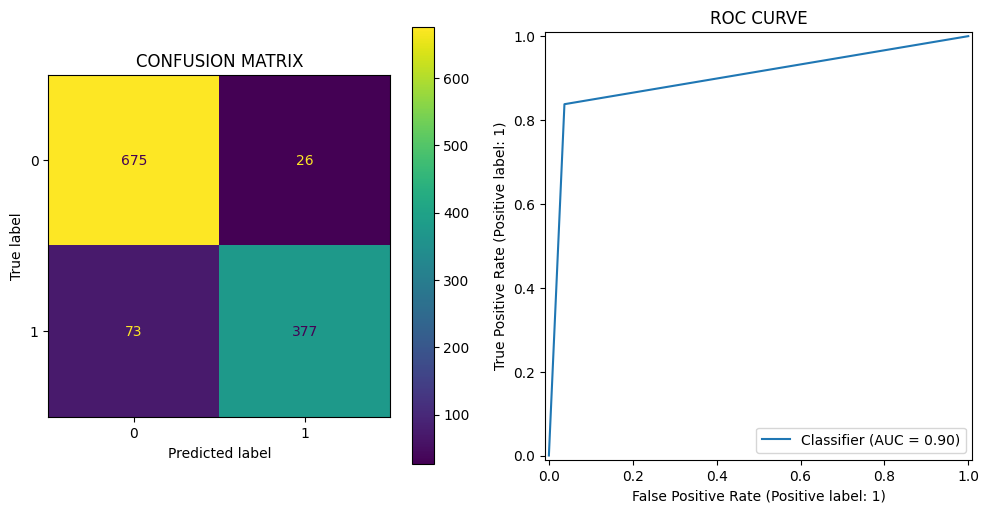

In [71]:
optimal_k = grid_search.best_params_['n_neighbors']
optimal_weights = grid_search.best_params_['weights']
optimal_metric = grid_search.best_params_['metric']
knn_ball=KNeighborsClassifier(
    n_neighbors=optimal_k,
    weights=optimal_weights,
    metric=optimal_metric,
    algorithm='ball_tree'
)

evaluate(knn_ball)